# TASK 1- Language modeling for the directory "Train and Test"


In [1]:
# Import needed libraries
import os
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import words
import matplotlib.pyplot as plt 
import pandas as pd

## 1. Tokenize the texts in the directory "Train and Test"

In [2]:
def tokenize_text(directory_path, separators):
    tokens = []
    for filename in os.listdir(directory_path):
        with open(os.path.join(directory_path, filename), 'r', encoding='latin-1') as file:
            text = file.read()
            # Tokenize 
            file_tokens = re.split(separators, text)
            # Remove empty tokens
            file_tokens = [token.strip() for token in file_tokens if token.strip()]
            tokens.extend(file_tokens)
    return tokens

# Define directory path and separators
directory_path = r"C:\Users\anate\IRProject\Train and Test"
separators = r'[;|:!*$#%()&=.,\'\/\"?\s-]'

# Call to function
tokens = tokenize_text(directory_path, separators)

# Adission: Remove numbers
tokens = [token for token in tokens if not token.isdigit()]

# Save the tokens to a file - for later use
def save_tokens_to_file(tokens, output_file="tokens.txt"):
    with open(output_file, "w", encoding='utf-8') as token_file:
        token_file.write("\n".join(tokens)) 

## 2. Create a language model for the collection

In [3]:
# Frequency of each word in the original text corpus
word_freq_original = Counter(tokens)

# Total number of words in the corpus
total_words_original = sum(word_freq_original.values())

# LM - Probability of the word occurring in the corpus by dividing its frequency by the total number of words in the corpus.
original_tokens_lm = {word: freq / total_words_original for word, freq in word_freq_original.items()}

###  size of the vocabulary &  words in the corpus

In [4]:
# Calculate and print the size of the vocabulary
vocab_size = len(word_freq_original)
print("The size of the vocabulary is:", vocab_size)

# Total number of words in the corpus
total_words_original = sum(word_freq_original.values())
print("Total number of words in the corpus:", total_words_original)

The size of the vocabulary is: 37408
Total number of words in the corpus: 494900


### Analyze- 20 most common words

In [5]:
# Get the top 20 most common words
top_20_words = word_freq_original.most_common(20)

# Create a list of tuples containing word, frequency, and probability
top_20_words_with_prob = [(word, freq, original_tokens_lm[word]) for word, freq in top_20_words]

# Create a DataFrame from the top 20 words with frequencies and probabilities
df = pd.DataFrame(top_20_words_with_prob, columns=['Word', 'Frequency', 'Probability'])

# Print the DataFrame
# Set the index to start from 1 instead of 0
df.index = df.index + 1
display(df)

,Word,Frequency,Probability
1,the,22309,0.045078
2,of,18014,0.036399
3,and,14165,0.028622
4,to,10095,0.020398
5,in,9495,0.019186
6,a,7105,0.014356
7,that,4960,0.010022
8,for,4456,0.009004
9,is,4408,0.008907
10,on,3094,0.006252


## 3. linguistic operations

### Remove stop words (stop_words_english.txt file in the joint folder)

In [6]:
# Read stop words from the text file given to us
stop_words_file = r"C:\Users\anate\IRProject\stop_words_english.txt"
with open(stop_words_file, 'r',encoding='latin-1') as file:
    stop_words = set(word.lower() for word in file.read().splitlines())

#Removing stop words
tokens_without_stop_words = [token for token in tokens if token.lower() not in stop_words]

####  size of the vocabulary &  words in the corpus after removal of stop words

In [7]:
# Calculate the word frequency after removval of stop words
word_freq_after_removal = Counter(tokens_without_stop_words)

# Calculate and print the size of the vocabulary after removing stop words
vocab_size_after_removal = len(word_freq_after_removal)
print("The size of the vocabulary after removing stop words is:", vocab_size_after_removal)

# Total number of words in the corpus after removing stop words
total_words_after_removal = sum(word_freq_after_removal.values())
print("Total number of words in the corpus after removing stop words:", total_words_after_removal)

The size of the vocabulary after removing stop words is: 36191
Total number of words in the corpus after removing stop words: 263856


#### Analyze- how stop words removal affects vocabulary size

In [8]:
# Calculate the number of stop words removed from the vocabulary size
num_stop_words_removed_from_vocab = vocab_size - vocab_size_after_removal
print("Number of stop words removed from the vocabulary:", num_stop_words_removed_from_vocab)

# Calculate the number of total stop words removed
num_stop_words_removed = total_words_original - total_words_after_removal
print("Number of total stop words removed:", num_stop_words_removed)

Number of stop words removed from the vocabulary: 1217
Number of total stop words removed: 231044


### Perform Case Folding

In [9]:
 tokens_without_stop_words_lowercase = [token.lower() for token in tokens_without_stop_words]

####  size of the vocabulary &  words in the corpus after case folding

In [10]:
# Calculate the word frequency after removal of stop words and lowercase transformation
word_freq_after_lower = Counter(tokens_without_stop_words_lowercase)

# Calculate and print the size of the vocabulary after removing stop words and lowercase transformation
vocab_size_after_lower = len(word_freq_after_lower)
print("The size of the vocabulary after removing upper case words is:", vocab_size_after_lower)

# Total number of words in the corpus after removing stop words and lowercase transformation
total_words_after_lower = sum(word_freq_after_lower.values())
print("Total number of words in the corpus after upper case words:", total_words_after_lower)

The size of the vocabulary after removing upper case words is: 31134
Total number of words in the corpus after upper case words: 263856


#### Analyze- how preforming lower case affects vocabulary size

In [11]:
# Calculate the number of upper case words removed from the vocabulary size
num_upper_case_removed_from_vocab = vocab_size_after_removal - vocab_size_after_lower
print("Number of upper case words removed from the vocabulary:",num_upper_case_removed_from_vocab)

Number of upper case words removed from the vocabulary: 5057


### Perform Stemming

In [12]:
stemmer = PorterStemmer()

tokens_without_stop_words_lowercase_stemmed= [stemmer.stem(token) for token in tokens_without_stop_words_lowercase]

####  size of the vocabulary &  words in the corpus after stemming

In [13]:
# Calculate the word frequency after removal of stop words and lowercase transformation
word_freq_after_stemming = Counter(tokens_without_stop_words_lowercase_stemmed)

# Calculate and print the size of the vocabulary after removing stop words and lowercase transformation
vocab_size_after_stemming = len(word_freq_after_stemming)
print("The size of the vocabulary after stemming words is:", vocab_size_after_stemming)

# Total number of words in the corpus after removing stop words and lowercase transformation
total_words_after_stemming = sum(word_freq_after_stemming.values())
print("Total number of words in the corpus after stemming words:", total_words_after_stemming)

The size of the vocabulary after stemming words is: 24045
Total number of words in the corpus after stemming words: 263856


#### Analyze- how preforming stemming affects vocabulary size

In [14]:
# Calculate the number of stemmed words
num_stemmed_words = vocab_size_after_lower - vocab_size_after_stemming
print("Number of stemmed words:",num_stemmed_words)

Number of stemmed words: 7089


## 4. New language model for your collection after every step in 2 above

### a. LM without stop words

In [15]:
word_freq_without_stop_words = Counter(tokens_without_stop_words)
total_words_without_stop_words = sum(word_freq_without_stop_words.values())
tokens_without_stop_words_lm = {word: freq / total_words_without_stop_words for word,
                                freq in word_freq_without_stop_words.items()}

#### Analyze- 20 most common words

In [16]:
top_20_words_without_stop = word_freq_without_stop_words.most_common(20)
top_20_words_without_stop_with_prob = [(word, freq, tokens_without_stop_words_lm[word]) for word,
                                       freq in top_20_words_without_stop]
df_without_stop = pd.DataFrame(top_20_words_without_stop_with_prob, columns=['Word', 'Frequency', 'Probability'])

df_without_stop.index = df_without_stop.index + 1
display(df_without_stop)

,Word,Frequency,Probability
1,bias,2518,0.009543
2,social,2373,0.008994
3,al,1174,0.004449
4,â,1089,0.004127
5,study,813,0.003081
6,group,769,0.002914
7,data,677,0.002566
8,Journal,655,0.002482
9,gender,647,0.002452
10,Social,634,0.002403


### b. LM after case folding

In [17]:
# LM after case folding
word_freq_lowercase = Counter(tokens_without_stop_words_lowercase)
total_words_lowercase = sum(word_freq_lowercase.values())
tokens_without_stop_words_lowercase_lm = {word: freq / total_words_lowercase for word, freq in word_freq_lowercase.items()}

#### Analyze- 20 most common words

In [18]:
top_20_words_without_stop_lowercase = word_freq_lowercase.most_common(20)
top_20_words_without_stop_with_prob_lowercase = [(word, freq, tokens_without_stop_words_lowercase_lm[word]) for word, freq in top_20_words_without_stop_lowercase]
df_without_stop_lowercase = pd.DataFrame(top_20_words_without_stop_with_prob_lowercase, columns=['Word', 'Frequency', 'Probability'])

df_without_stop_lowercase.index = df_without_stop_lowercase.index + 1
display(df_without_stop_lowercase)

,Word,Frequency,Probability
1,bias,3091,0.011715
2,social,3087,0.011700
3,al,1203,0.004559
4,â,1089,0.004127
5,study,1051,0.003983
6,gender,834,0.003161
7,group,820,0.003108
8,data,793,0.003005
9,journal,774,0.002933
10,language,771,0.002922


### c. LM after stemming

In [19]:
word_freq_stemmed = Counter(tokens_without_stop_words_lowercase_stemmed)
total_words_stemmed = sum(word_freq_stemmed.values())
tokens_without_stop_words_lowercase_stemmed_lm = {word: freq / total_words_stemmed for word,
                                                  freq in word_freq_stemmed.items()}


#### Analyze- 20 most common words

In [20]:
top_20_words_without_stop_words_lowercase_stemmed = word_freq_stemmed.most_common(20)
top_20_words_stop_words_lowercase_stemmed_with_prob = [(word, freq, tokens_without_stop_words_lowercase_stemmed_lm.get(word, 0)) for word, freq in top_20_words_without_stop_words_lowercase_stemmed]
df_without_stop_words_lowercase_stemmed = pd.DataFrame(top_20_words_stop_words_lowercase_stemmed_with_prob, columns=['Word', 'Frequency', 'Probability'])

df_without_stop_words_lowercase_stemmed.index = df_without_stop_words_lowercase_stemmed.index + 1
display(df_without_stop_words_lowercase_stemmed)

,Word,Frequency,Probability
1,social,3462,0.013121
2,bia,3092,0.011719
3,studi,1814,0.006875
4,group,1339,0.005075
5,review,1263,0.004787
6,al,1215,0.004605
7,model,1107,0.004195
8,â,1089,0.004127
9,measur,1085,0.004112
10,report,1033,0.003915


## 5. Compare differences - plots of words probabilities in each LM 

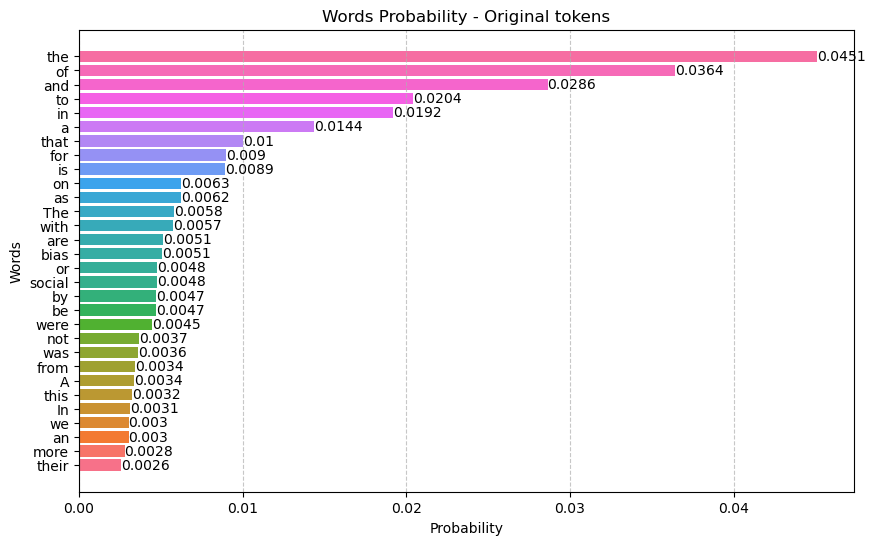

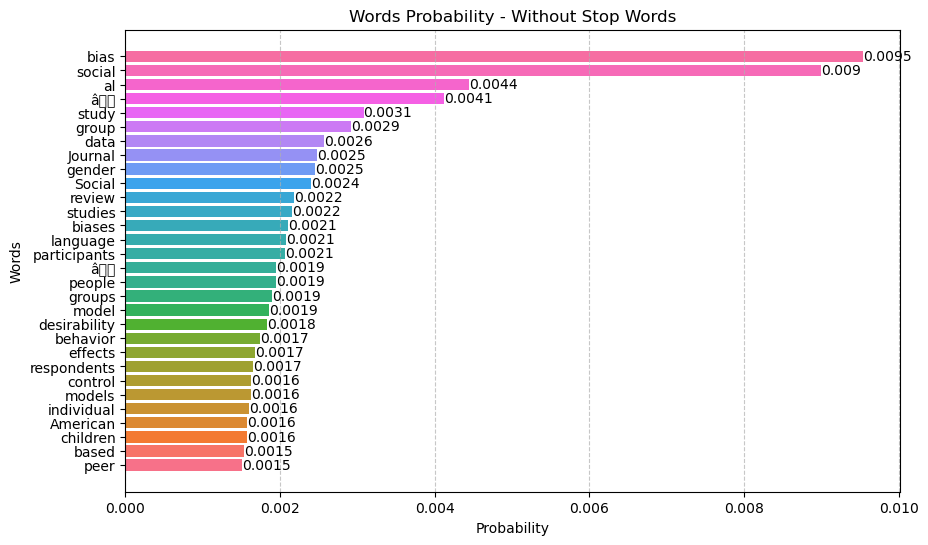

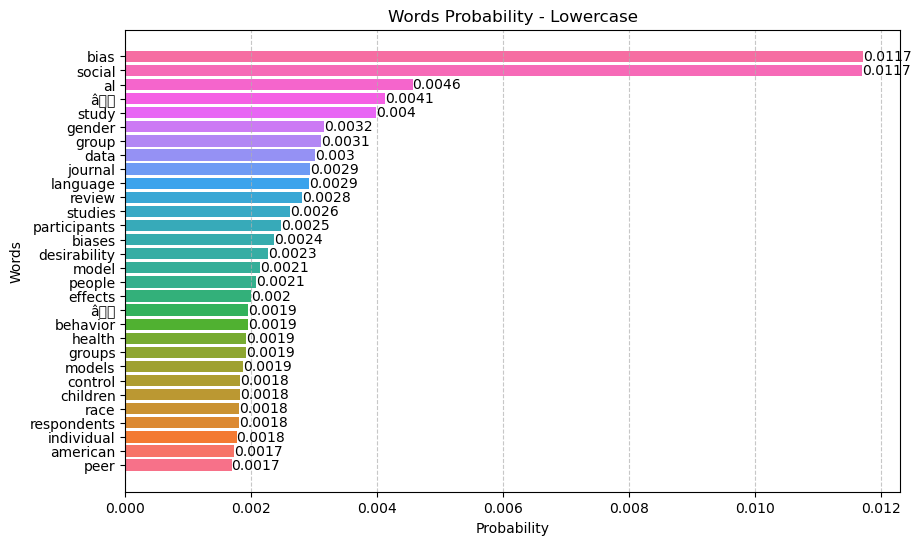

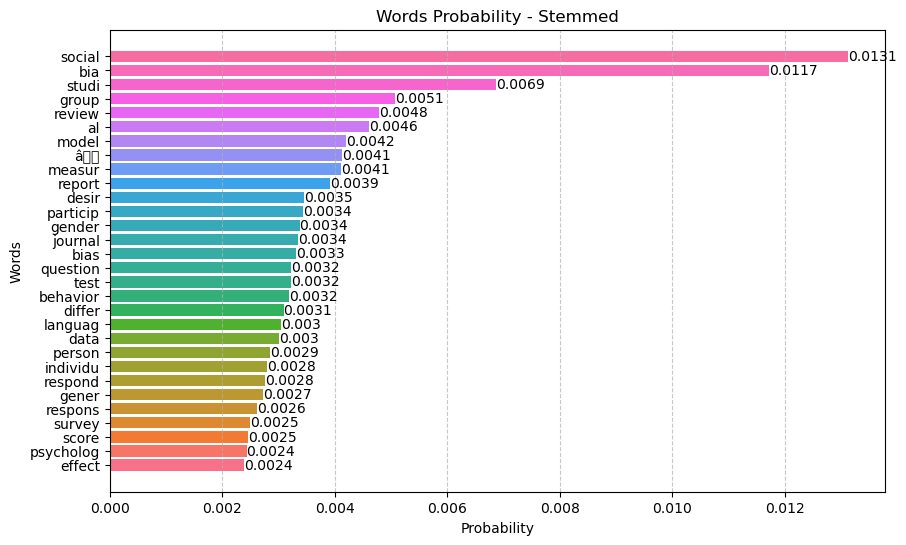

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_word_probs(lm, title):
    sorted_word_probs = sorted(lm.items(), key=lambda x: x[1], reverse=True)
    top_words = sorted_word_probs[:30]
    words, probabilities = zip(*reversed(top_words))  # Reverse the order of words and probabilities
    
    # Define color palette
    colors = sns.color_palette("husl", len(words))
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(words, probabilities, color=colors)  # Use barh() for horizontal bar plot
    plt.title(title)
    plt.xlabel('Probability')  # Change xlabel to represent Probability
    plt.ylabel('Words')  # Change ylabel to represent Words
    plt.gca().set_facecolor('white')  # Set background color to white
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add vertical grid lines
    
    # Add annotations
    for bar, prob in zip(bars, probabilities):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(prob, 4),
                 va='center')
    
    plt.show()

# Step 8: Plot word probability distribution
plot_word_probs(original_tokens_lm, 'Words Probability - Original tokens')
plot_word_probs(tokens_without_stop_words_lm, 'Words Probability - Without Stop Words')
plot_word_probs(tokens_without_stop_words_lowercase_lm, 'Words Probability - Lowercase')
plot_word_probs(tokens_without_stop_words_lowercase_stemmed_lm, 'Words Probability - Stemmed')
